## Scalar quantizer: correlation with quality of search

In [54]:
import numpy as np
from test import test_index
from sklearn.model_selection import train_test_split

In [55]:
all_data = np.loadtxt('./sample_data/final128_10K.txt')
(data_matrix, query_matrix) = train_test_split(all_data[:1000], test_size = 0.1)


In [56]:
data_matrix[0].shape

(128,)

<hr>

## Parameters

In [57]:
regularity = 16
candidates = 10
guard_hops = 25
attempts = 2
k = 10 # top k neigbours

In [58]:
quantization_levels = list(range(5,101,5))

<hr>

## Experiment

In [31]:
recalls = []
params = {'regularity':regularity, 'attempts':attempts, 'guard_hops':guard_hops,
            'quantize':True}
for q_l in quantization_levels:
    params['quantization_levels'] = q_l
    result_stats = test_index('NSWG', data=data_matrix, query=query_matrix, k=k, params=params)
    recalls.append(result_stats['recall'])

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (18, 8)

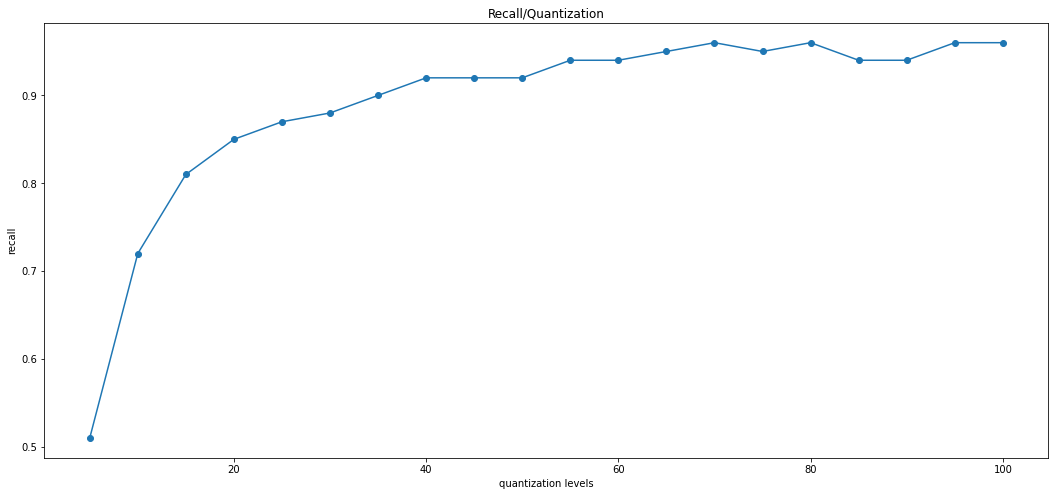

In [51]:
fig, ax = plt.subplots(1)
ax.set(xlabel='quantization levels', ylabel='recall')
ax.plot(quantization_levels, recalls, marker="o")
ax.set_title('Recall/Quantization')
plt.show()